In [114]:
# model or libraries used

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [115]:
# reading csv
df =  pd.read_csv("dataset/Cardiovascular_Disease_Dataset.csv")

In [116]:
# first five rows
df.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


In [117]:
df.shape

(1000, 14)

In [118]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


In [119]:
df.columns


Index(['patientid', 'age', 'gender', 'chestpain', 'restingBP',
       'serumcholestrol', 'fastingbloodsugar', 'restingrelectro',
       'maxheartrate', 'exerciseangia', 'oldpeak', 'slope', 'noofmajorvessels',
       'target'],
      dtype='object')

In [120]:
print(df.isnull().sum())

patientid            0
age                  0
gender               0
chestpain            0
restingBP            0
serumcholestrol      0
fastingbloodsugar    0
restingrelectro      0
maxheartrate         0
exerciseangia        0
oldpeak              0
slope                0
noofmajorvessels     0
target               0
dtype: int64


In [121]:
df.duplicated().sum()


np.int64(0)

<Axes: >

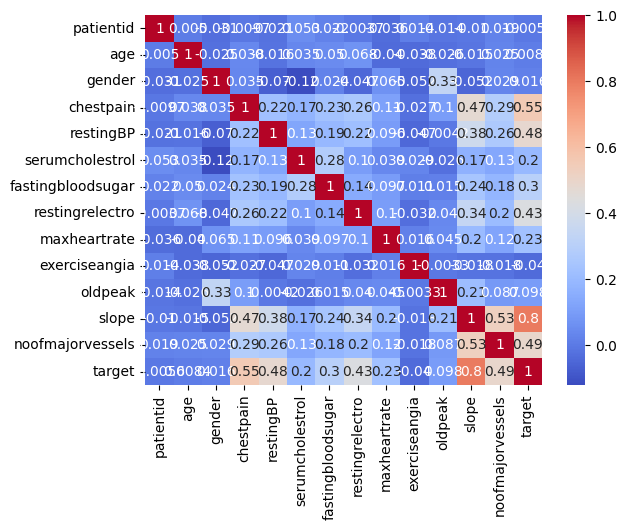

In [122]:
# heat map to see data 
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [123]:
#seperating values

X = df.drop("target", axis=1)
y = df["target"]

In [124]:
#scaler 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

In [126]:
#logistic regression

log_reg = LogisticRegression(max_iter=1000)

param_grid = {'C': [0.01, 0.1, 1, 10],'penalty': ['l2'],'solver': ['liblinear']}

grid_lr = GridSearchCV(log_reg,param_grid,cv=5,scoring='f1',n_jobs=-1)

grid_lr.fit(X_train, y_train)


,estimator,LogisticRegre...max_iter=1000)
,param_grid,"{'C': [0.01, 0.1, ...], 'penalty': ['l2'], 'solver': ['liblinear']}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [127]:
best_lr = grid_lr.best_estimator_


In [128]:
y_pred_lr = best_lr.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1-score:", f1_score(y_test, y_pred_lr))


Accuracy: 0.9833333333333333
Precision: 0.9774011299435028
Recall: 0.9942528735632183
F1-score: 0.9857549857549858


In [129]:
confusion_matrix(y_test, y_pred_lr)

array([[122,   4],
       [  1, 173]])

In [130]:
# decision tree 

dt = DecisionTreeClassifier(random_state=42)

param_grid_dt = {'max_depth': [3, 5, 10, None],'min_samples_split': [2, 5, 10],'criterion': ['gini', 'entropy']}

grid_dt = GridSearchCV(dt,param_grid_dt,cv=5,scoring='f1',n_jobs=-1)

grid_dt.fit(X_train, y_train)


,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [3, 5, ...], 'min_samples_split': [2, 5, ...]}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


In [131]:
best_dt = grid_dt.best_estimator_
y_pred_dt = best_dt.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Accuracy: 0.9733333333333334
[[123   3]
 [  5 169]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       126
           1       0.98      0.97      0.98       174

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



In [132]:
#random forest 

rf = RandomForestClassifier(random_state=42)

param_grid_rf = {'n_estimators': [100, 200],'max_depth': [5, 10, None],'min_samples_split': [2, 5]}

grid_rf = GridSearchCV(rf,param_grid_rf,cv=5,scoring='f1',n_jobs=-1)

grid_rf.fit(X_train, y_train)


,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [5, 10, ...], 'min_samples_split': [2, 5], 'n_estimators': [100, 200]}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [133]:
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-score:", f1_score(y_test, y_pred_rf))


Accuracy: 0.98
Precision: 0.9772727272727273
Recall: 0.9885057471264368
F1-score: 0.9828571428571429


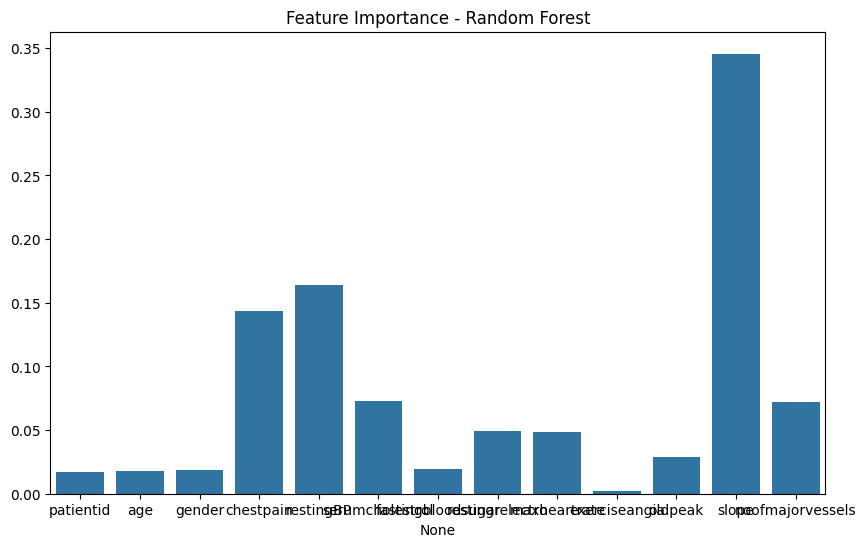

In [134]:
# visulaiztion  data

importances = best_rf.feature_importances_
features = X.columns

plt.figure(figsize=(10,6))
sns.barplot(y=importances,x=features)
plt.title("Feature Importance - Random Forest")
plt.show()

In [137]:
#  models comparisom made data frame

results = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest"],
    "Accuracy": [accuracy_score(y_test, y_pred_lr),accuracy_score(y_test, y_pred_dt),accuracy_score(y_test, y_pred_rf)
    ],
    "Precision": [precision_score(y_test, y_pred_lr),precision_score(y_test, y_pred_dt),precision_score(y_test, y_pred_rf)
    ],
    "Recall": [recall_score(y_test, y_pred_lr),recall_score(y_test, y_pred_dt),recall_score(y_test, y_pred_rf)],
    "F1-score": [f1_score(y_test, y_pred_lr),f1_score(y_test, y_pred_dt),f1_score(y_test, y_pred_rf)]})

results


,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.983333,0.977401,0.994253,0.985755
1,Decision Tree,0.973333,0.982558,0.971264,0.976879
2,Random Forest,0.980000,0.977273,0.988506,0.982857
